# Used Car Price Prediction Using Random Forest Algorithm

I have made this model which will try to predict estimated price of old car on basis of thier features. 
As now a day we know many people are going to buy second hand car instead of buying new one, 
but main question is how will us know actual price of car  on their features so in order to solve this problem 
I have used this dataset to build model which will give a estimated price of car at which car should be sold.

## Contents

This Dataset contains information of 6000+ old cars with different models and features like their Year, Name of the Company, KM driven, Power, Fuel Type and Location.

This Dataset contains total 12 features

1. Name

2. Location

3. Year

4. Kilometers_Driven

5. Fuel_Type

6. Transmission

7. Owner_Type

8. Mileage

9. Engine

10. Power

11. Seats

12. Price

### Importing necessary libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\anuus\\OneDrive\\Desktop\\class\\usedcar.csv")    ## we are loading our dataset

In [3]:
df.head()         ## retrieve first 5 row of dataset

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df.shape              ## Used to check shape of dataset

(6019, 14)

In [5]:
df['New_Price'].isna().sum()

5195

In [6]:
df.drop(['New_Price'],axis=1,inplace=True)           ## Droping the 'New_price' column 

In [7]:
df=df.drop('Unnamed: 0',axis=1)                      ## Droping the 'Unnamed: 0' column 

In [8]:
df.shape              ##checking the shape of dataset

(6019, 12)

In [9]:
df.info()              ## Used to extract information about columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


## Data Cleaning

#### Location

In [10]:
df['Location'].value_counts()       ## used to give counts of unique value in column 

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

#### Fuel Type

In [11]:
df['Fuel_Type'].value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [12]:
df[(df['Fuel_Type']=='Electric') | (df['Fuel_Type']=='LPG')]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,2.35
936,Maruti Wagon R LXI LPG BSIV,Hyderabad,2012,72000,LPG,Manual,First,26.2 km/kg,998 CC,58.2 bhp,5.0,2.85
987,Maruti Wagon R LXI DUO BSIII,Mumbai,2008,64226,LPG,Manual,First,17.3 km/kg,1061 CC,57.5 bhp,5.0,1.45
2278,Hyundai Santro Xing GLS LPG,Pune,2010,55000,LPG,Manual,Second,13.45 km/kg,1086 CC,62.1 bhp,5.0,1.65
2385,Hyundai Santro Xing GLS LPG,Hyderabad,2011,17000,LPG,Manual,First,13.45 km/kg,1086 CC,62.1 bhp,5.0,3.10
2436,Hyundai i10 Magna LPG,Jaipur,2012,53000,LPG,Manual,Second,19.2 km/kg,1086 CC,68.05 bhp,5.0,2.85
2941,Hyundai Santro Xing GL Plus LPG,Hyderabad,2014,56000,LPG,Manual,First,13.45 km/kg,1086 CC,62.1 bhp,5.0,3.20
3595,Maruti Wagon R LX DUO BSIII,Hyderabad,2007,65047,LPG,Manual,First,17.3 km/kg,1061 CC,57.5 bhp,5.0,1.95
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75


In [13]:
i =df[(df['Fuel_Type']=='LPG') | (df['Fuel_Type']=='Electric')].index      ## dropping row which Fuel_Type is LPG or electric
df.drop(i,axis=0,inplace=True)                                                  

#### Transmission

In [14]:
df['Transmission'].value_counts()

Manual       4289
Automatic    1718
Name: Transmission, dtype: int64

#### Owner_Type

In [15]:
df['Owner_Type'].value_counts()

First             4919
Second             966
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [16]:
i = df[df['Owner_Type']=='Fourth & Above'].index              ## dropping row which Owner_Type is Fourth & Above
df.drop(i,axis=0,inplace=True)

#### Seats

In [17]:
df['Seats'].value_counts()

5.0     4998
7.0      672
8.0      132
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

In [18]:
df[df['Seats']>8].index                               ## getting index which have more than 8 seats
df['Seats']=np.where(df['Seats']>8,5,df['Seats'])

In [19]:
df.drop(df[df['Seats']==0].index,axis=0,inplace=True)         ## droping which have 0 seat

In [20]:
df['Seats'].value_counts()

5.0    5006
7.0     672
8.0     132
4.0      99
6.0      31
2.0      16
Name: Seats, dtype: int64

#### Name

In [21]:
df['Name']

0                 Maruti Wagon R LXI CNG
1       Hyundai Creta 1.6 CRDi SX Option
2                           Honda Jazz V
3                      Maruti Ertiga VDI
4        Audi A4 New 2.0 TDI Multitronic
                      ...               
6014                    Maruti Swift VDI
6015            Hyundai Xcent 1.1 CRDi S
6016               Mahindra Xylo D4 BSIV
6017                  Maruti Wagon R VXI
6018               Chevrolet Beat Diesel
Name: Name, Length: 5997, dtype: object

In [22]:
df['Model']=df['Name'].map(lambda x: str(x).strip().split(" ")[1])        #making Model column by taking 2 value of name

In [23]:
df['Name']=df['Name'].map(lambda x: str(x).strip().split(" ")[0])         #putting first value of name in name column

In [24]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Model
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Wagon
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Creta
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Jazz
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Ertiga
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,A4


#### Year

In [25]:
df['Year'].value_counts()

2014    796
2015    744
2016    740
2013    649
2017    587
2012    575
2011    464
2010    339
2018    298
2009    197
2008    171
2007    122
2019    102
2006     77
2005     56
2004     31
2003     17
2002     15
2001      7
2000      4
1998      4
1999      2
Name: Year, dtype: int64

In [26]:
df['Year']=np.where(df['Year'].astype(int)<2003,"less than 2003",df['Year'])      ## it will group less than 2003 in one group

In [27]:
df['Year'].value_counts()

2014              796
2015              744
2016              740
2013              649
2017              587
2012              575
2011              464
2010              339
2018              298
2009              197
2008              171
2007              122
2019              102
2006               77
2005               56
less than 2003     32
2004               31
2003               17
Name: Year, dtype: int64

## Checking data type

In [28]:
df.dtypes

Name                  object
Location              object
Year                  object
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
Model                 object
dtype: object

#### Mileage

In [29]:
df['Mileage']

0       26.6 km/kg
1       19.67 kmpl
2        18.2 kmpl
3       20.77 kmpl
4        15.2 kmpl
           ...    
6014     28.4 kmpl
6015     24.4 kmpl
6016     14.0 kmpl
6017     18.9 kmpl
6018    25.44 kmpl
Name: Mileage, Length: 5997, dtype: object

In [30]:
df['Mileage']=df['Mileage'].map(lambda x: str(x).strip().split(" ")[0])    ## using map & lambda function to split and 
                                                                           ## take first value from column

In [31]:
df['Mileage']=df['Mileage'].astype(float)           ## converting object type to float
df['Mileage'].head()

0    26.60
1    19.67
2    18.20
3    20.77
4    15.20
Name: Mileage, dtype: float64

#### Engine

In [32]:
df['Engine'].unique

<bound method Series.unique of 0        998 CC
1       1582 CC
2       1199 CC
3       1248 CC
4       1968 CC
         ...   
6014    1248 CC
6015    1120 CC
6016    2498 CC
6017     998 CC
6018     936 CC
Name: Engine, Length: 5997, dtype: object>

In [33]:
def fun(x):                                       ## creating a function to extract first value from Engine column
    if x == None:
        return x
    elif len(str(x).split(" "))==2:
        return str(x).split(" ")[0]

In [34]:
df['Engine']=df['Engine'].apply(fun)            ## applying function to Engine column

In [35]:
df['Engine']=df['Engine'].astype(float)            ## converting object type to float
df['Engine'].head()

0     998.0
1    1582.0
2    1199.0
3    1248.0
4    1968.0
Name: Engine, dtype: float64

In [36]:
df['Engine'].isna().sum()                          ## checking null value 

35

In [37]:
df['Engine'].mean()                               ## calculating mean for engine column

1621.7853069439786

In [38]:
df['Engine'].fillna(df['Engine'].mean(),inplace=True)             ## filling null value with mean value of engine 

In [39]:
df['Engine'].isna().sum()                      ## cross checking for null value

0

#### Power

In [40]:
df['Power'].unique                       ## checking unique values

<bound method Series.unique of 0       58.16 bhp
1       126.2 bhp
2        88.7 bhp
3       88.76 bhp
4       140.8 bhp
          ...    
6014       74 bhp
6015       71 bhp
6016      112 bhp
6017     67.1 bhp
6018     57.6 bhp
Name: Power, Length: 5997, dtype: object>

In [41]:
df['Power']=df['Power'].apply(fun)            ## applying function to Power column

In [42]:
df['Power'].head()

0    58.16
1    126.2
2     88.7
3    88.76
4    140.8
Name: Power, dtype: object

In [43]:
df['Power'].isnull().sum()                    ## checking null value

35

In [44]:
df['Power'] = pd.to_numeric(df['Power'],errors='coerce')           ## converting data type to numeric

In [45]:
df['Power'].mean()                       ## calculating mean for Power column

113.37310397814491

In [46]:
df['Power'].fillna(df['Power'].mean(),inplace=True)       ## replacing null values with mean

#### Seats

In [47]:
df['Seats'].isna().sum()                      ## checking null value 

41

In [48]:
df2=df['Seats'].mode()                       ## finding mode for seats column
df2

0    5.0
dtype: float64

In [49]:
df['Seats'].fillna(value=df2[0], inplace = True)          ## filling null value with mode

In [50]:
df.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Model                0
dtype: int64

# EDA (Exploratory Data Analysis)

### Total Cars of all Companies

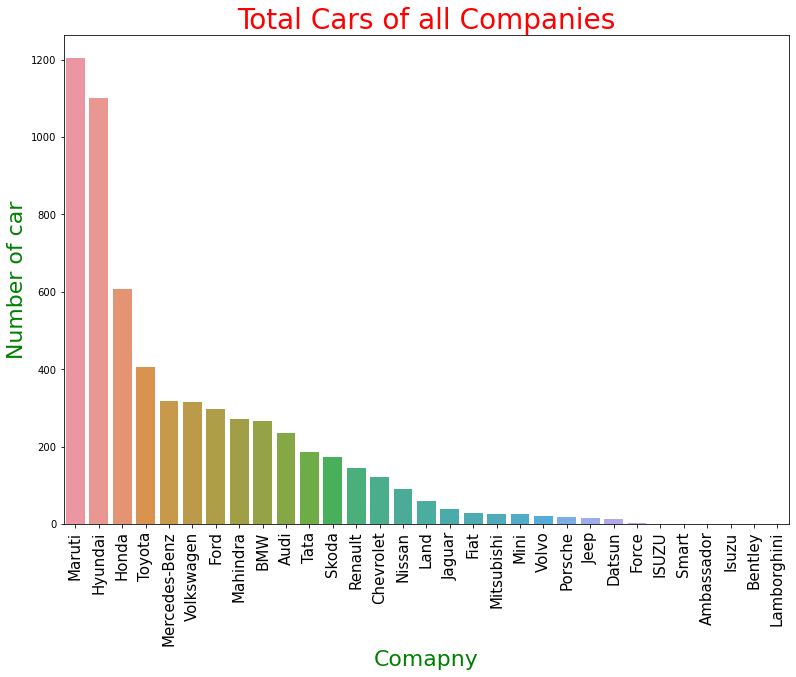

In [51]:
plt.figure(figsize=(13,9))
most_car = df['Name'].value_counts()
sns.barplot(y=most_car, x=most_car.index, data=df)
plt.xticks(size=15,rotation=90)
plt.xlabel("Comapny",size=22,c="g")
plt.ylabel("Number of car",size=22,c="g")
plt.title("Total Cars of all Companies",size=28,c="r")
plt.show()

Conclusion :-

As we can see that Bently, Force, Lamborghini, and Isuzu cars are very less and Maruti and Hyundai are most sold car

In [52]:
df['Name'].value_counts()[df['Name'].value_counts()<5]

Force          3
ISUZU          2
Smart          1
Ambassador     1
Isuzu          1
Bentley        1
Lamborghini    1
Name: Name, dtype: int64

In [53]:
i = df['Name'].value_counts()[df['Name'].value_counts()<5].index
index = df[df['Name'].isin(i)].index
df.drop(index,axis=0,inplace=True)

### Total Cars Location wise

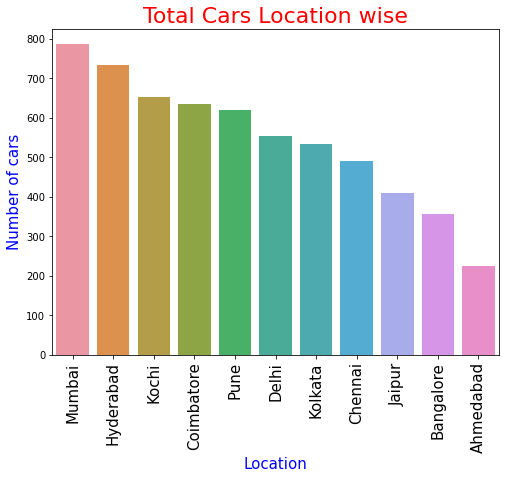

In [54]:
plt.figure(figsize=(8,6))
most_cat = df['Location'].value_counts()
sns.barplot(y=most_cat, x=most_cat.index, data=df)
plt.xticks(size=15,rotation=90)
plt.xlabel("Location",size=15,c="b")
plt.ylabel("Number of cars",size=15,c="b")
plt.title("Total Cars Location wise",size=22,c="r")
plt.show()

conclusion :-
    
As we can see cars from mumbai hyderbad and Kochi are very high and 
cars from ahmedabad are very less as compared to all

### Engine v/s Price

<AxesSubplot:xlabel='Engine', ylabel='Price'>

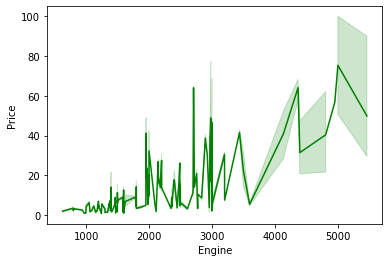

In [55]:
sns.lineplot(x=df['Engine'], y=df['Price'], color="green")

### Price range of differents manufactures

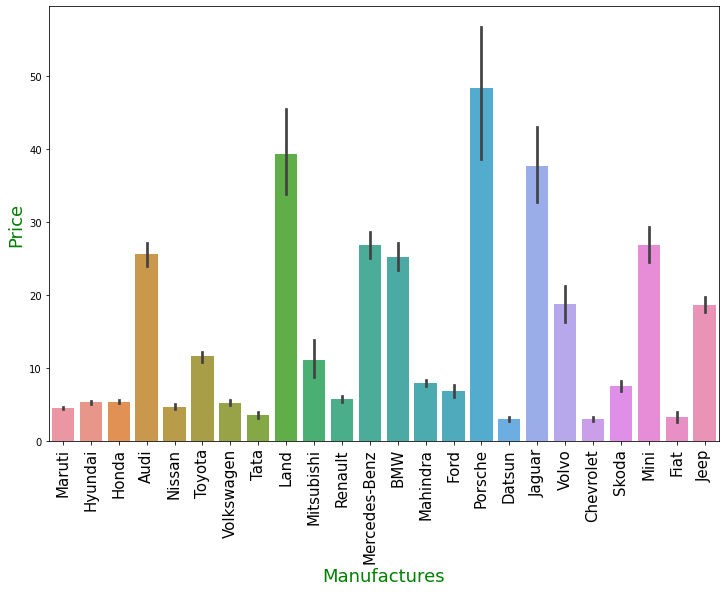

In [56]:
plt.figure(figsize=(12,8))
sns.barplot(data=df,x="Name",y="Price")
plt.xlabel("Manufactures",size=18,c="g")
plt.ylabel("Price",size=18,c="g")
# plt.title("Price range of differents manufactures",size=25,c="r")
plt.xticks(rotation='vertical',size=15)
plt.show()

conclusion :-
    
Here clearly we can see that price of cars more depends on its brand and 
range of price is different for differents brand

### Fuel Types

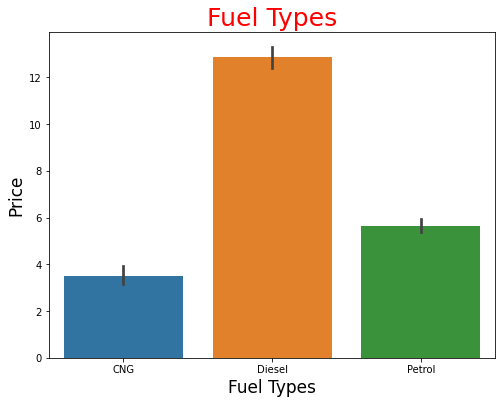

In [57]:
plt.figure(figsize=(8,6))
sns.barplot(data=df,x="Fuel_Type",y="Price")
plt.xlabel("Fuel Types",size=17,c="k")
plt.ylabel("Price",size=17,c="k")
plt.title("Fuel Types",size=25,c="red")
plt.show()

conclusion :-
    
See Price for different fuel types
Price of diesel cars are more than petrol

### Year vs Price

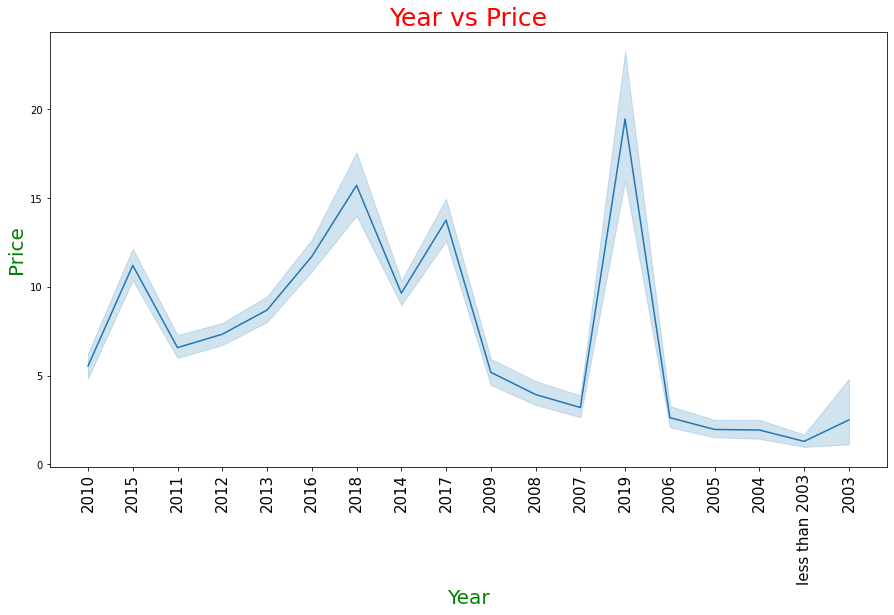

In [58]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df,x="Year",y="Price")
plt.xlabel("Year",size=20,c="g")
plt.ylabel("Price",size=20,c="g")
plt.xticks(size=15,rotation=90)
plt.title("Year vs Price",size=25,c="r")
plt.show()

conclusion :-
    
We can see clearly that as car become older its price get reduces


### Number of Seats

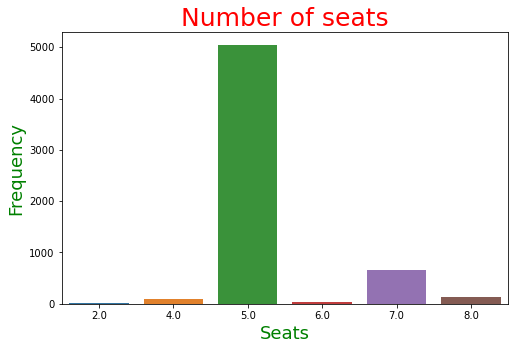

In [59]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x="Seats")
plt.xlabel("Seats",size=18,c="g")
plt.ylabel("Frequency",size=18,c="g")
plt.title("Number of seats",size=25,c="r")
plt.show()

conclusion :-
    
Frequency of 5 seaters cas is very high as compared to other

#### Owner type 

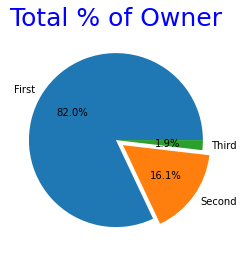

In [60]:
labels =df['Owner_Type'].value_counts().index
sizes = df['Owner_Type'].value_counts()
ex=[0,0.1,0]
plt.pie(sizes, labels=labels,autopct='%1.1f%%',explode=ex)
plt.title('Total % of Owner',size = 25,c="b")
plt.show()

Conclusion :-
    
percentages of 1st Owners is very high ie 82 %

#### Effect of Fuel type Price

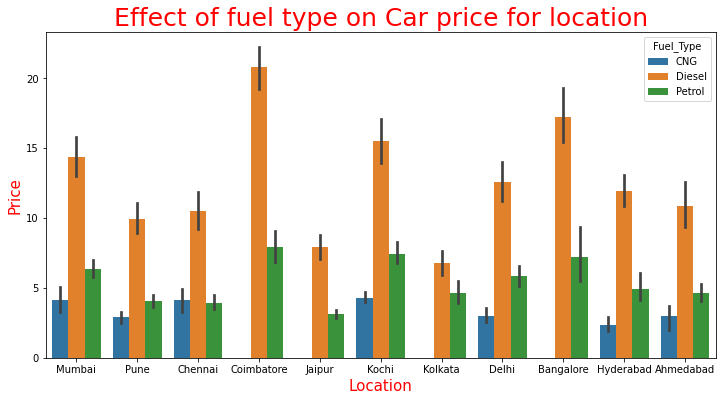

In [61]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,y="Price",x='Location',hue='Fuel_Type')
plt.xlabel("Location",size=15,c="r")
plt.ylabel("Price",size=15,c="r")
plt.title("Effect of fuel type on Car price for location",size=25,c="red")
plt.show()

Conclusion :-
    
Here clearly we can see that price of Diesel car is more than than petrol irespective of location

### Power v/s Price

<AxesSubplot:xlabel='Power', ylabel='Price'>

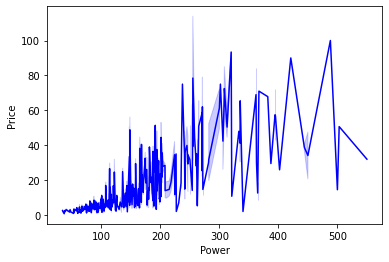

In [62]:
sns.lineplot(x=df['Power'], y=df['Price'], color="b")

#### Effect of fuel type on price of differents brands

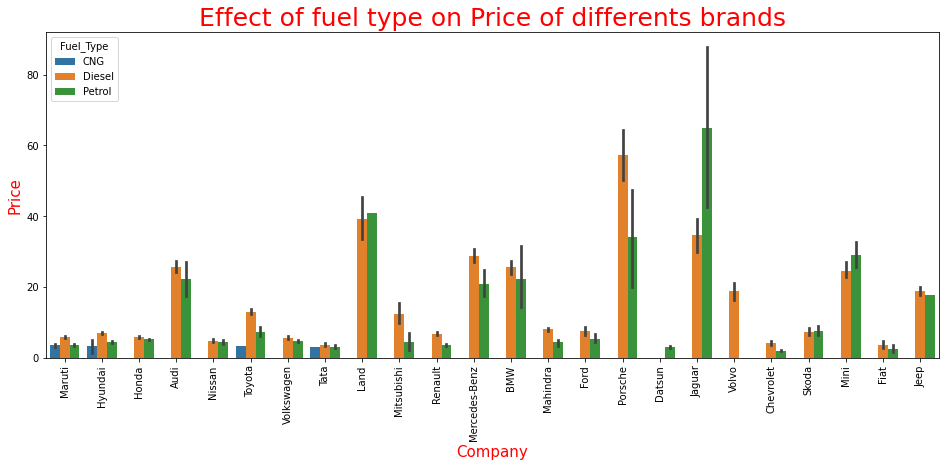

In [63]:
plt.figure(figsize=(16,6))
sns.barplot(data=df,y="Price",x='Name',hue='Fuel_Type')
plt.xlabel("Company",size=15,c="r")
plt.ylabel("Price",size=15,c="r")
plt.xticks(rotation="vertical",size=10)
plt.title("Effect of fuel type on Price of differents brands",size=25,c="red")
plt.show()

#### Owner relation with Price

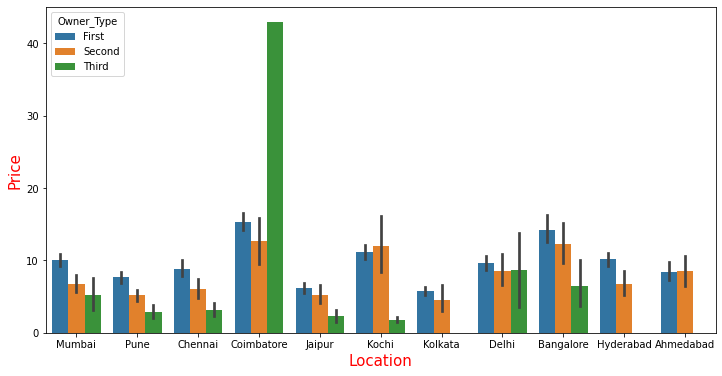

In [64]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,y="Price",x='Location',hue='Owner_Type')
plt.xlabel("Location",size=15,c="red")
plt.ylabel("Price",size=15,c="red")
plt.show()

### Heat Map

<AxesSubplot:>

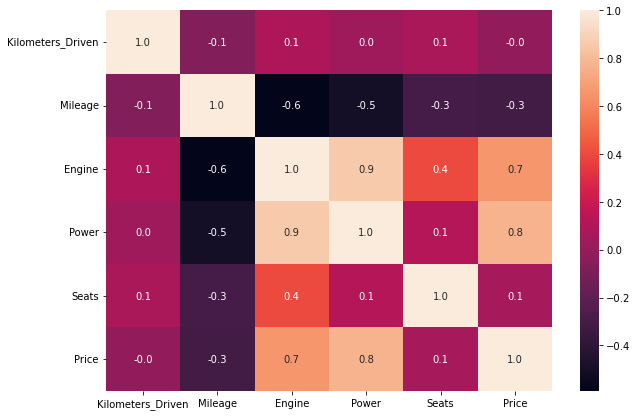

In [65]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,fmt='.1f')

Conclusion :-
    
Here we can see that Engine Power has strong positive realtion with price
But we can also realise that Engine and Power itself has strong relation So In order to avoid multicolinearity problem we will drop one which has less correlation with price
Power has good relation with price as compared to Engine so we will drop Engine

# Feature Engineering

In [66]:
df.columns                                     ## checking all the column in dataset

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Model'],
      dtype='object')

#### Drop Features with very less correlation with output price

In [67]:
df.drop(['Mileage','Seats','Engine','Transmission','Kilometers_Driven'],axis=1,inplace=True)      ## dropping less correlated column from dataset

In [68]:
# now we are combining both name and car model in one column

In [69]:
df['Car'] = df['Name'].astype(str) + " " + df['Model']

In [70]:
df.head(3)

,Name,Location,Year,Fuel_Type,Owner_Type,Power,Price,Model,Car
0,Maruti,Mumbai,2010,CNG,First,58.16,1.75,Wagon,Maruti Wagon
1,Hyundai,Pune,2015,Diesel,First,126.20,12.50,Creta,Hyundai Creta
2,Honda,Chennai,2011,Petrol,First,88.70,4.50,Jazz,Honda Jazz


In [71]:
df.drop(['Name','Model'],axis=1,inplace=True)                     ## dropping name and model column frm dataset

In [72]:
df.head()

,Location,Year,Fuel_Type,Owner_Type,Power,Price,Car
0,Mumbai,2010,CNG,First,58.16,1.75,Maruti Wagon
1,Pune,2015,Diesel,First,126.20,12.50,Hyundai Creta
2,Chennai,2011,Petrol,First,88.70,4.50,Honda Jazz
3,Chennai,2012,Diesel,First,88.76,6.00,Maruti Ertiga
4,Coimbatore,2013,Diesel,Second,140.80,17.74,Audi A4


In [73]:
df = df[['Car','Location','Year','Owner_Type','Fuel_Type','Power','Price']]   ##rearranging the columns 

In [74]:
df.head()

,Car,Location,Year,Owner_Type,Fuel_Type,Power,Price
0,Maruti Wagon,Mumbai,2010,First,CNG,58.16,1.75
1,Hyundai Creta,Pune,2015,First,Diesel,126.20,12.50
2,Honda Jazz,Chennai,2011,First,Petrol,88.70,4.50
3,Maruti Ertiga,Chennai,2012,First,Diesel,88.76,6.00
4,Audi A4,Coimbatore,2013,Second,Diesel,140.80,17.74


# Removing Outliers

### removing outliers of Power

<AxesSubplot:xlabel='Power'>

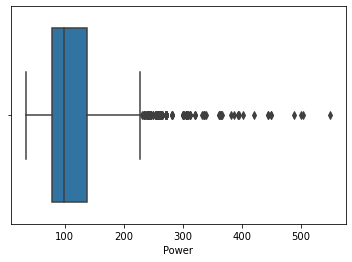

In [75]:
sns.boxplot(x=df['Power'])

In [76]:
percentile25 = df['Power'].quantile(0.25)
percentile75 = df['Power'].quantile(0.75)

In [77]:
iqr= percentile75 - percentile25

In [78]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
upper_limit,lower_limit

(228.075, -12.045000000000002)

In [79]:
df[(df.Power<lower_limit) | (df.Power>upper_limit)]

,Car,Location,Year,Owner_Type,Fuel_Type,Power,Price
38,Mercedes-Benz M-Class,Pune,2013,First,Diesel,254.80,28.00
70,Porsche Cayenne,Mumbai,2008,First,Petrol,500.00,14.50
103,Audi A4,Kolkata,2010,First,Diesel,241.40,9.80
107,Jaguar XF,Hyderabad,2011,Second,Diesel,270.90,24.00
134,Mercedes-Benz SLC,Kolkata,2017,First,Petrol,362.07,54.00
...,...,...,...,...,...,...,...
5919,Jaguar F,Hyderabad,2015,First,Petrol,488.10,100.00
5927,Audi Q5,Coimbatore,2018,First,Diesel,241.40,45.52
5946,BMW 5,Bangalore,2016,First,Diesel,258.00,48.00
6008,Porsche Panamera,Hyderabad,2013,Second,Diesel,300.00,45.00


In [80]:
df.shape

(5987, 7)

In [81]:
df_new =  df[(df.Power>lower_limit) & (df.Power<upper_limit)]

In [82]:
df_new.shape

(5750, 7)

# Label encoding

It is used to convert the categorical variable to numerical variable

In [83]:
from sklearn.preprocessing import LabelEncoder                  ## importing label encoder

In [84]:
le=LabelEncoder()

In [85]:
df.Car=le.fit_transform(df.Car)                              ## converting all the categorical variable into numerical variable
df.Location=le.fit_transform(df.Location)                    ## like:- car,location,fuel type,owner type, year
df.Fuel_Type=le.fit_transform(df.Fuel_Type)
df.Owner_Type=le.fit_transform(df.Owner_Type)
df.Year=le.fit_transform(df.Year)

In [86]:
df.head()

,Car,Location,Year,Owner_Type,Fuel_Type,Power,Price
0,119,9,7,0,0,58.16,1.75
1,62,10,12,0,1,126.20,12.50
2,57,2,8,0,2,88.70,4.50
3,106,2,9,0,1,88.76,6.00
4,1,3,10,1,1,140.80,17.74


# Model training

In [87]:
X = df.drop("Price",axis=1)   #X --> Independent variables
Y= df['Price']                #Y --> Dependent variable

In [88]:
from sklearn.model_selection import train_test_split                               ## importing train test split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)   ## splitting train and test data set 

## Linear Regression

In [89]:
from sklearn.linear_model import LinearRegression              ## importing linear Regression
lr = LinearRegression()

In [90]:
lr.fit(X_train, Y_train)                                       ## fitting x_train and Y_train in model
y_pred= lr.predict(X_test)
print("Accuracy on Traning set: ",lr.score(X_train,Y_train)*100)       ##Checking the accuracy of model 
print("Accuracy on Testing set: ",lr.score(X_test,Y_test)*100)

Accuracy on Traning set:  67.59795653059832
Accuracy on Testing set:  69.6851407901136


In [91]:
from sklearn.metrics import mean_squared_error,r2_score            ## importing performance matrix
print("Mean Square error: ",mean_squared_error(y_pred,Y_test))     ## checking mean square error and R2 error
print("r square error",r2_score(y_pred,Y_test))

Mean Square error:  32.90596426726359
r square error 0.5793052517189643


## Decision Tree

In [92]:
from sklearn.tree import DecisionTreeRegressor                 ## importing Decision tree model
dt = DecisionTreeRegressor(random_state = 0) 
dt.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

In [93]:
y_pred= dt.predict(X_test)                                           ## fitting x_train and Y_train in model
print("Accuracy on Trainng set: ",dt.score(X_train,Y_train)*100)
print("Accuracy on Testing set: ",dt.score(X_test,Y_test)*100)         ##Checking the accuracy of model

Accuracy on Trainng set:  99.8696738438991
Accuracy on Testing set:  74.2806409182583


In [94]:
print("Mean Square error: ",mean_squared_error(y_pred,Y_test))          ## checking mean square error and R2 error
print("r square error",r2_score(y_pred,Y_test))

Mean Square error:  27.917672487316345
r square error 0.7700141739167973


## Random Forest Regressor

In [95]:
from sklearn.ensemble import RandomForestRegressor                   ## importing Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100,random_state = 1)

In [96]:
rf.fit(X_train, Y_train)                                             ## fitting x_train and Y_train in model
y_pred= rf.predict(X_test)

print("Accuracy on Trainng set: ",rf.score(X_train,Y_train)*100)
print("Accuracy on Testing set: ",rf.score(X_test,Y_test)*100)        ##Checking the accuracy of model

Accuracy on Trainng set:  98.20136567059441
Accuracy on Testing set:  90.13684553975507


In [97]:
print("Mean Square error: ",mean_squared_error(y_pred,Y_test))            ## checking mean square error and R2 error
print("r square error",r2_score(y_pred,Y_test))

Mean Square error:  10.706188868773491
r square error 0.8985339060009732


In [98]:
df=pd.DataFrame({'Actual':Y_test, 'Predicted':y_pred})                ##checking model accuracy on test dataset
df.head()

,Actual,Predicted
5815,9.46,8.075717
1594,6.21,4.808330
2644,5.90,5.101900
2964,6.15,6.342764
498,4.15,4.554700


So, Random Forest Regressor is giving highest accuracy 

## Hyperparameter tunning

In [99]:
from sklearn.model_selection import GridSearchCV                 # importing grid search cv
param_grid = {'bootstrap': [True], 'max_depth': [100,50, 150], 'max_features': ['auto',3], 'n_estimators': [80,100,150]}      ##giving different values for hyperparameters

In [100]:
rfr = RandomForestRegressor(random_state = 10)                
grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid)

In [101]:
grid_search.fit(X_train, Y_train);           ##fitting data in model
print(grid_search.best_params_);             ##printing best parameter for model

C:\Users\anuus\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\anuus\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\anuus\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

{'bootstrap': True, 'max_depth': 100, 'max_features': 3, 'n_estimators': 100}


In [102]:
print("Accuracy on Traing set: ",grid_search.score(X_train,Y_train)*100)
print("Accuracy on Testing set: ",grid_search.score(X_test,Y_test)*100) 

Accuracy on Traing set:  98.09049983402498
Accuracy on Testing set:  90.90530701162282
